# <span style="color:green">Formation South Green 2022</span> - Structural Variants Detection by using short and long reads 

# __DAY 2 : How to analyze mapping results ?__ 

Created by C. Tranchant (DIADE-IRD), J. Orjuela (DIADE-IRD), F. Sabot (DIADE-IRD) and A. Dereeper (PHIM-IRD)

## __1. Get some basic mapping stats with samtools flagstat__ 

### First go into the directory that contains all the bam files  


In [104]:
%cd /home/jovyan/work/MAPPING-ILL/BAM
%ls

/home/jovyan/work/MAPPING-ILL/BAM
all_stat.csv          Clone10.bam.stat     Clone2.bam.stat      Clone3.bam.stat
Clone10.bam           Clone2.bam           Clone3.bam
Clone10.bam.flagstat  Clone2.bam.flagstat  Clone3.bam.flagstat


### Run samtools flagstat on each bam file (generated by bwa-mem2) - `for loop`
Save the flagstat output into a file - ex : Clone2.bam -> Clone2.bam.flagstat

In [5]:
%%bash

for file in *bam;
do
    echo $file
    samtools flagstat $file > $file.flagstat
done;
ls  *flagstat 

Clone10.bam
Clone2.bam
Clone3.bam
Clone10.bam.flagstat
Clone2.bam.flagstat
Clone3.bam.flagstat


### Let's look the content of one file 

In [6]:
cat Clone2*stat

266640 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 duplicates
266640 + 0 mapped (100.00%:-nan%)
266640 + 0 paired in sequencing
133320 + 0 read1
133320 + 0 read2
266640 + 0 properly paired (100.00%:-nan%)
266640 + 0 with itself and mate mapped
0 + 0 singletons (0.00%:-nan%)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
266640 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 duplicates
266640 + 0 mapped (100.00%:-nan%)
266640 + 0 paired in sequencing
133320 + 0 read1
133320 + 0 read2
266640 + 0 properly paired (100.00%:-nan%)
266640 + 0 with itself and mate mapped
0 + 0 singletons (0.00%:-nan%)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### Merge individual flagstat files into an unique file with python code

In [71]:
# IMPORT PYTHON PACKAGE USED BY THE CODE
import os
import pandas as pd




# VARIABLE INITIALIZATION

## NAME OF THE DIRECTORY THAT CONTAINS FLAGSTAT FILES
flagstat_dir = "/home/jovyan/work/MAPPING-ILL/BAM/" #PUT THE DIRECTORY NAME THAT CONTAINS FLAGSTAT FILES 

## NAME OF THE FILE THAT WILL CONTAIN ALL THE FLAGSTAT RESULTATS
stat_file = flagstat_dir + "all_stat.csv"


# PRINT THE CONTENT OF 2 PREVIOUS VARIABLES INITIALIZED
print("DIRECTORY : ",flagstat_dir)
print("FINAL STAT FILE : ",stat_file)



In [78]:
# OPEN THE FINAL FILE IN WHICH WE PRINT SOME STATS EXTRACTED FROM EACH INDIVIDUAL FILE GENERATED BY SAMTOOLS FLAGSTAT
stat = open(stat_file, "w")

# WRITE A HEADER LINE IN OUR STAT FILE
header_line = "sample,mapped,paired, unmapped"
stat.write(header_line)

# READING EACH FILE OF THE FLGSTAT DIRECTORY
for file in os.listdir(flagstat_dir):
    #print("\n>>>>>>>> file: ",file)
    
    if "flagstat" in file:
        #print("Reading only flagstat file :",file)
        
        # Extract sample name and save into a new variable newLine 
        sample_name = file.split('.')[0]
        #print(f"Sample : {sample_name}")
        newLine = f"\n {sample_name},"
        
        # Read individual flagstat file
        ## OPEN THE FILE
        with open(file, "r") as flagstat:
            # READ THE FILE LINE BY LINE
            for line in flagstat:
                # REMOVE THE LINE SKIPPER AT THE END OF THE LINE
                line = line.rstrip()
                #print(f">>>>>>>>>> LINE : {line}")
                
                # Keep only line mapped, paired or singleton word
                if 'mapped (' in line or 'paired (' in line or 'singleton' in line:
                    # get percentage value and save it into the varaible called perc
                    perc = f"{line.split('(')[1].split('%')[0]}"
                    newLine += f"{perc},"
            
            flagstat.close()   
            # WRITE THE LINE ONCE THE FLAGSTAT FILE COMPLETELY READ
            stat.write(newLine)

stat.close()

### Display the content of the final stat file

In [79]:
%cat $stat_file

sample,mapped,paired, unmapped
 Clone2,100.00,100.00,0.00,
 Clone10,74.74,73.71,0.55,
 Clone3,100.00,100.00,0.00,

### Generate Plot

#### Load csv file into a panda datafrale


In [82]:
df_bam_stat = pd.read_csv(stat_file, index_col=False)
df_bam_stat

,sample,mapped,paired,unmapped
0,Clone2,100.00,100.00,0.00
1,Clone10,74.74,73.71,0.55
2,Clone3,100.00,100.00,0.00


#### Basic stats

In [99]:
# Je n'affiche que les valeurs de la colonne "mapped"
print(df_bam_stat["mapped"])

0    100.00
1     74.74
2    100.00
Name: mapped, dtype: float64


In [96]:
# J affiche la moyenne, min et max de cette colonne
print("\n######## BASIC STATS\n MAPPED")
print("## % min - max :", df_bam_stat["mapped"].min(), "-", df_bam_stat["mapped"].max())
print("## % mean :", df_bam_stat["mapped"].mean())



######## BASIC STATS
 MAPPED
## % min - max : 74.74 - 100.0
## % mean : 91.58


<AxesSubplot:xlabel='sample', ylabel='paired'>

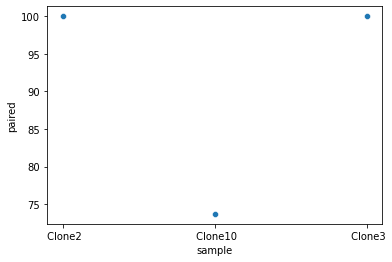

In [100]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="sample",y="paired", data=df_bam_stat)

Text(0.5, 0, 'PUT YOUR Y AXIS')

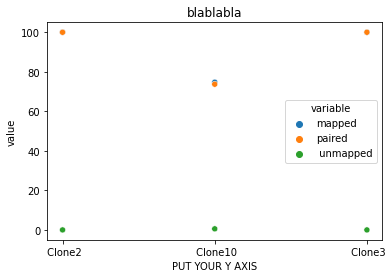

In [110]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.scatterplot(x="sample",y="value", hue='variable', data=pd.melt(df_bam_stat, 'sample'))
ax.set_title("blablabla")
ax.set_xlabel("PUT YOUR X AXIS")
ax.set_xlabel("PUT YOUR Y AXIS")

### EXERCICE : DO THE SAME THING WITH MINIMAP2 RESULTS

## __2. Get some basic mapping stats with  vcf files__ 